<a href="https://colab.research.google.com/github/Kiplimo288/BigData/blob/main/TGS2611_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model comes up with Methane concentrations for the TGS 2600 based on Aeris data and Temp and HUmidity.

In [5]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 2: Load Data
# Assuming your dataset is named 'ML_DATA.csv'
data = pd.read_csv('ML_DATA.csv')

# Step 3: Data Preprocessing
# Extract features and target variable
X = data[['TGS2611', 'DHT22_Temperature', 'DHT22_Humidity']]  # Features
y = data['CH4 (ppm)']  # Target variable

# Step 4: Randomly Split Data into Training and Testing Sets
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Predict on the testing set using Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Predict on the testing set using Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)
print("Linear Regression R-squared:", r2_linear)

# Calculate Mean Squared Error (MSE) and R-squared for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor Mean Squared Error:", mse_rf)
print("Random Forest Regressor R-squared:", r2_rf)

# Step 7: Model Equations and Feature Importances
# Linear Regression
intercept = linear_model.intercept_
coefficients = linear_model.coef_

print("Linear Regression Intercept:", intercept)
print("Linear Regression Coefficients:", coefficients)
print(f"Linear Regression Equation: CH4 (ppm) = {intercept} + {coefficients[0]} * TGS2611 + {coefficients[1]} * DHT22_Temperature + {coefficients[2]} * DHT22_Humidity")

# Random Forest
feature_importances = rf_model.feature_importances_

# Print the feature importances
print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

# Step 8: Save the models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')


Linear Regression Mean Squared Error: 3.1611778554312746
Linear Regression R-squared: 0.0028654055444814475
Random Forest Regressor Mean Squared Error: 2.1458560174287538
Random Forest Regressor R-squared: 0.3231297422818251
Linear Regression Intercept: 3.125368673055238
Linear Regression Coefficients: [-5.48926584e-05 -1.54628852e-02 -6.38928463e-03]
Linear Regression Equation: CH4 (ppm) = 3.125368673055238 + -5.4892658446034115e-05 * TGS2611 + -0.01546288523043654 * DHT22_Temperature + -0.006389284634512047 * DHT22_Humidity
Random Forest Feature Importances:
Feature: TGS2611, Importance: 0.3429847771128869
Feature: DHT22_Temperature, Importance: 0.25822008469150975
Feature: DHT22_Humidity, Importance: 0.39879513819560336


['rf_model.pkl']

In [1]:
# Step 1: Import Libraries
import pandas as pd
import joblib

# Step 2: Load the Trained Models
# Load Linear Regression model
linear_model = joblib.load('linear_model.pkl')

# Load Random Forest Regressor model
rf_model = joblib.load('rf_model.pkl')

# Step 3: Load the New Dataset
# Assuming your new dataset is named 'TGS2600_Trained_PREDICTED.csv'
new_data = pd.read_csv('TGS2600_Trained_Predicted.csv')

# Step 4: Predict CH4 Values using Trained Models
# Extract features
X_new = new_data[['TGS2611', 'DHT22_Temperature', 'DHT22_Humidity']]

# Predict CH4 values using Linear Regression
new_data['TGS2611CH4_Regression'] = linear_model.predict(X_new)

# Predict CH4 values using Random Forest Regressor
new_data['TGS2611CH4_RandomForest'] = rf_model.predict(X_new)

# Step 5: Save the Updated DataFrame with Predicted Values
# Assuming you want to save the updated DataFrame to a new CSV file
new_data.to_csv('TGS2600&2611_Trained_Predicted.csv', index=False)


In [2]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 2: Load the Updated DataFrame with Predicted Values
predicted_data = pd.read_csv('TGS2600&2611_Trained_Predicted.csv')

# Step 3: Extract Actual and Predicted CH4 Values
actual_ch4 = predicted_data['CH4 (ppm)']
predicted_ch4_linear = predicted_data['TGS2611CH4_Regression']
predicted_ch4_rf = predicted_data['TGS2611CH4_RandomForest']

# Step 4: Calculate Metrics for Linear Regression Model
r2_linear = r2_score(actual_ch4, predicted_ch4_linear)
mae_linear = mean_absolute_error(actual_ch4, predicted_ch4_linear)
mse_linear = mean_squared_error(actual_ch4, predicted_ch4_linear)

# Step 5: Calculate Metrics for Random Forest Model
r2_rf = r2_score(actual_ch4, predicted_ch4_rf)
mae_rf = mean_absolute_error(actual_ch4, predicted_ch4_rf)
mse_rf = mean_squared_error(actual_ch4, predicted_ch4_rf)

# Step 6: Print the Results
print("Linear Regression Model:")
print("R-squared:", r2_linear)
print("Mean Absolute Error:", mae_linear)
print("Mean Squared Error:", mse_linear)
print()
print("Random Forest Model:")
print("R-squared:", r2_rf)
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)


Linear Regression Model:
R-squared: 0.003230114327950173
Mean Absolute Error: 0.5960174761589535
Mean Squared Error: 3.044755791945425

Random Forest Model:
R-squared: 0.7220060910757378
Mean Absolute Error: 0.18862442235681823
Mean Squared Error: 0.8491664691013555


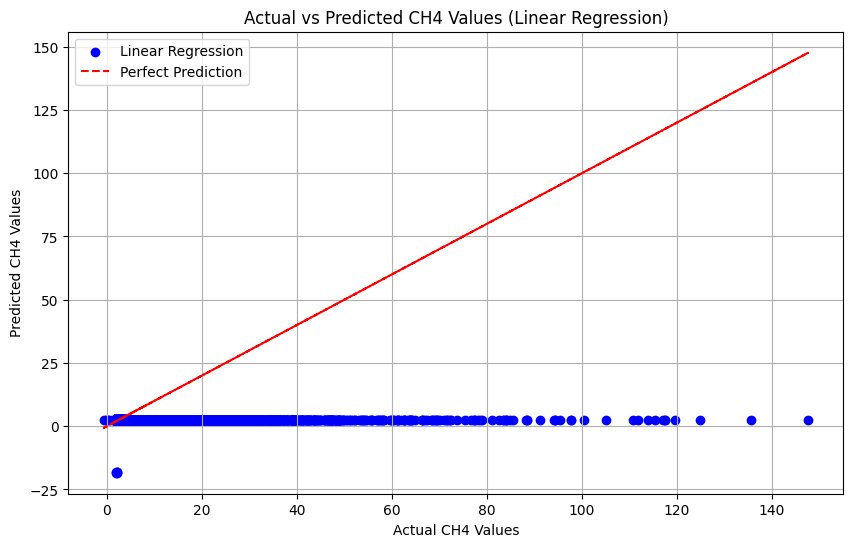

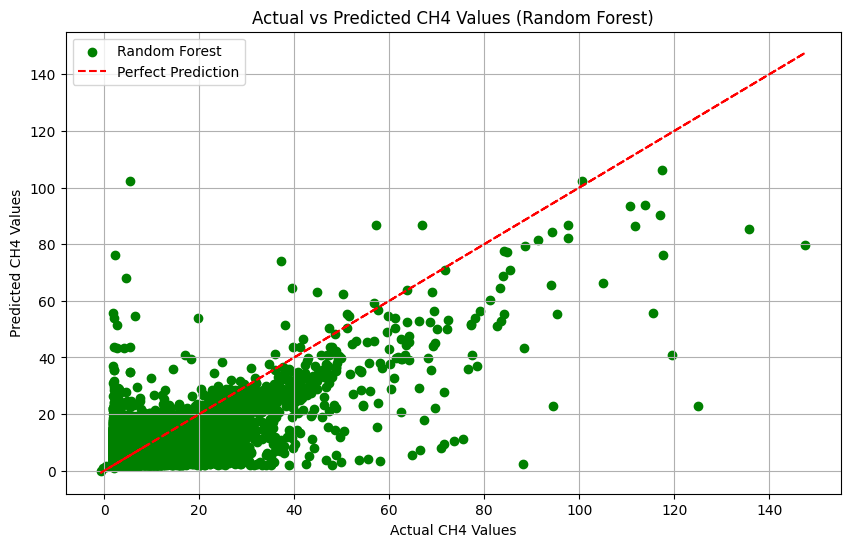

In [3]:
# Step 1: Import Libraries
import matplotlib.pyplot as plt

# Step 2: Plot Actual vs Predicted CH4 Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(actual_ch4, predicted_ch4_linear, color='blue', label='Linear Regression')
plt.plot(actual_ch4, actual_ch4, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted CH4 Values (Linear Regression)')
plt.xlabel('Actual CH4 Values')
plt.ylabel('Predicted CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Plot Actual vs Predicted CH4 Values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(actual_ch4, predicted_ch4_rf, color='green', label='Random Forest')
plt.plot(actual_ch4, actual_ch4, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted CH4 Values (Random Forest)')
plt.xlabel('Actual CH4 Values')
plt.ylabel('Predicted CH4 Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Read the Updated DataFrame with Predicted Values
predicted_data = pd.read_csv('TGS2600&2611_Trained_Predicted.csv')

# Step 3: Extract Actual and Predicted CH4 Values
actual_ch4 = predicted_data['CH4 (ppm)']
predicted_ch4_linear = predicted_data['TGS2611CH4_Regression']
predicted_ch4_rf = predicted_data['TGS2611CH4_RandomForest']

# Step 4: Scatter Plot of Target Variable vs Predicted Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.scatter(predicted_data['Timestamp'], predicted_ch4_linear, color='red', label='Linear Regression Predictions')
plt.title('Actual CH4 Values vs Linear Regression Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Scatter Plot of Target Variable vs Predicted Values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.scatter(predicted_data['Timestamp'], predicted_ch4_rf, color='green', label='Random Forest Predictions')
plt.title('Actual CH4 Values vs Random Forest Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Time Series Plot of Target Variable vs Predicted Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.plot(predicted_data['Timestamp'], predicted_ch4_linear, color='red', label='Linear Regression Predictions')
plt.title('Time Series Plot of Actual CH4 Values vs Linear Regression Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Time Series Plot of Target Variable vs Predicted Values for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Timestamp'], actual_ch4, color='blue', label='Actual CH4 Values')
plt.plot(predicted_data['Timestamp'], predicted_ch4_rf, color='green', label='Random Forest Predictions')
plt.title('Time Series Plot of Actual CH4 Values vs Random Forest Predictions')
plt.xlabel('Timestamp')
plt.ylabel('CH4 Values')
plt.legend()
plt.grid(True)
plt.show()


Equations

In [ ]:
####Equation for linear regression
# Get the intercept and coefficients of the Linear Regression model
intercept = linear_model.intercept_
coefficients = linear_model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Print the Linear Regression equation
print(f"Linear Regression Equation: CH4 (ppm) = {intercept} + {coefficients[0]} * TGS2600 + {coefficients[1]} * DHT22_Temperature + {coefficients[2]} * DHT22_Humidity")


NameError: name 'linear_model' is not defined

In [ ]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")
